In [4]:
#actualise automatiquement les modules importés
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import torch

from advi2 import ADVI2
from ppca import PPCA_with_ARD_model

[[ 1.]
 [-1.]]
True principal axes:
[[ 1.]
 [-1.]]
Shift:
[ 0. 10.]


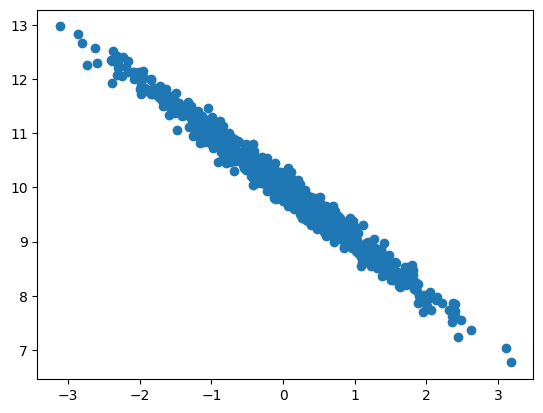

In [5]:
# note that in the function below D should be greater then K
def build_toy_dataset(N, D, K, sigma=1):
    x_train = np.zeros([D, N])
    w = np.zeros([D,K])
    for k in range(K):
        w[k,k]=1.0/(k+1)
        w[k+1,k]=-1.0/(k+1)
    print(w)
    z = np.random.normal(0.0, 1.0, size=(K, N))
    mean = np.dot(w, z)
    shift=np.zeros([D])
    shift[1]=10
    for d in range(D):
      for n in range(N):
        x_train[d, n] = np.random.normal(mean[d, n], sigma)+shift[d]
    print("True principal axes:")
    print(w)
    print("Shift:")
    print(shift)
    return x_train.astype(np.float32,copy=False)


#ed.set_seed(142)

N = 1000  # number of data points
D = 2  # data dimensionality
K = 1  # latent dimensionality

# DATA

x_train = build_toy_dataset(N, D, K, sigma = 0.1)
x_train = torch.tensor(x_train).permute(1,0)
plt.plot(x_train[:,0],x_train[:, 1],'o')

Fitting...:   0%|          | 0/20 [00:00<?, ?it/s]

Zeta: tensor([-0.6934,  2.1704, -0.4149, -0.6850, -1.3640,  0.2138,  0.4031,  0.4980,
         0.6320,  1.0009], grad_fn=<AddBackward0>)
Theta: tensor([-0.6934,  2.1704, -0.4149, -0.6850, -1.3640,  0.2138,  1.4965,  1.6454,
         1.8814,  2.7207], grad_fn=<CatBackward0>)
Log prob: -21146.45703125
Log det: 2.5339953899383545
Entropy: 14.1893949508667
Zeta: tensor([-0.5249,  0.1595, -1.5393,  0.2418,  1.8836, -0.2698, -0.1435, -1.9939,
         1.1717, -0.5687], grad_fn=<AddBackward0>)
Theta: tensor([-0.5249,  0.1595, -1.5393,  0.2418,  1.8836, -0.2698,  0.8663,  0.1362,
         3.2273,  0.5662], grad_fn=<CatBackward0>)
Log prob: -26586.119140625
Log det: -1.5344469547271729
Entropy: 14.229395866394043
Zeta: tensor([-0.2615, -0.6194, -0.7256,  0.5468, -0.3468, -0.2217, -0.4582,  0.6577,
        -0.1223, -0.5139], grad_fn=<AddBackward0>)
Theta: tensor([-0.2615, -0.6194, -0.7256,  0.5468, -0.3468, -0.2217,  0.6324,  1.9304,
         0.8849,  0.5981], grad_fn=<CatBackward0>)
Log prob: -

Fitting...:   5%|▌         | 1/20 [00:02<00:50,  2.67s/it]

Zeta: tensor([ 0.0371, -0.1158,  1.1204,  0.2245,  0.5106,  3.3714,  0.0625,  0.3015,
         0.5264,  0.4087], grad_fn=<AddBackward0>)
Theta: tensor([ 0.0371, -0.1158,  1.1204,  0.2245,  0.5106,  3.3714,  1.0645,  1.3518,
         1.6928,  1.5049], grad_fn=<CatBackward0>)
Log prob: -8697.8134765625
Log det: 1.2990589141845703
Entropy: 14.490480422973633
Zeta: tensor([ 0.0877,  0.4338,  4.6928, -1.0435,  0.9811,  3.2660,  0.1893,  2.2227,
         1.2791,  1.1350], grad_fn=<AddBackward0>)
Theta: tensor([ 0.0877,  0.4338,  4.6928, -1.0435,  0.9811,  3.2660,  1.2084,  9.2327,
         3.5935,  3.1112], grad_fn=<CatBackward0>)
Log prob: -6036.8212890625
Log det: 4.826172828674316
Entropy: 14.493663787841797
Zeta: tensor([-0.9004,  1.7190, -0.0596, -0.3422,  0.3044,  0.3979,  0.3233,  2.1433,
        -0.3170,  2.4096], grad_fn=<AddBackward0>)
Theta: tensor([-0.9004,  1.7190, -0.0596, -0.3422,  0.3044,  0.3979,  1.3816,  8.5277,
         0.7283, 11.1295], grad_fn=<CatBackward0>)
Log prob: 

Fitting...:  10%|█         | 2/20 [00:05<00:46,  2.56s/it]

Zeta: tensor([-0.4988,  0.2935,  0.3780,  2.1822,  0.8521,  2.0590,  0.4507,  2.3109,
         1.5023,  0.0406], grad_fn=<AddBackward0>)
Theta: tensor([-0.4988,  0.2935,  0.3780,  2.1822,  0.8521,  2.0590,  1.5695, 10.0830,
         4.4919,  1.0415], grad_fn=<CatBackward0>)
Log prob: -6145.619140625
Log det: 4.304486274719238
Entropy: 13.0292329788208
Zeta: tensor([ 1.7413e-01, -3.7052e-01, -9.4729e+00,  3.6907e+00,  5.6575e-01,
         3.6451e+00,  1.6597e+00,  2.3487e+00,  6.1007e-03,  3.1218e-01],
       grad_fn=<AddBackward0>)
Theta: tensor([ 0.1741, -0.3705, -9.4729,  3.6907,  0.5657,  3.6451,  5.2576, 10.4720,
         1.0061,  1.3664], grad_fn=<CatBackward0>)
Log prob: -5471.80224609375
Log det: 4.326661109924316
Entropy: 13.01309585571289
Zeta: tensor([ 0.4080, -0.0624, -3.0562,  1.2875,  0.7564,  4.0573, -0.2834,  3.3361,
         0.1077,  0.8646], grad_fn=<AddBackward0>)
Theta: tensor([ 0.4080, -0.0624, -3.0562,  1.2875,  0.7564,  4.0573,  0.7533, 28.1088,
         1.1137,  

Fitting...:  15%|█▌        | 3/20 [00:07<00:43,  2.53s/it]

Zeta: tensor([ 0.1605, -0.4069,  0.7432, -1.7003,  0.0944,  2.8825,  0.3950,  2.7039,
         0.2778, -0.5639], grad_fn=<AddBackward0>)
Theta: tensor([ 0.1605, -0.4069,  0.7432, -1.7003,  0.0944,  2.8825,  1.4844, 14.9384,
         1.3203,  0.5690], grad_fn=<CatBackward0>)
Log prob: -5235.04833984375
Log det: 2.812847375869751
Entropy: 11.107065200805664
Zeta: tensor([-0.2205, -0.7198,  2.4408,  1.6665, -0.5104, -0.0105,  0.0137,  1.5507,
         1.1620,  0.5599], grad_fn=<AddBackward0>)
Theta: tensor([-0.2205, -0.7198,  2.4408,  1.6665, -0.5104, -0.0105,  1.0138,  4.7150,
         3.1963,  1.7505], grad_fn=<CatBackward0>)
Log prob: -6174.18212890625
Log det: 3.2863316535949707
Entropy: 11.083189010620117
Zeta: tensor([-0.2373, -0.1938,  2.0302, -5.4256,  0.4080,  2.4279, -0.3102,  1.2733,
         0.3318,  1.1377], grad_fn=<AddBackward0>)
Theta: tensor([-0.2373, -0.1938,  2.0302, -5.4256,  0.4080,  2.4279,  0.7333,  3.5727,
         1.3934,  3.1194], grad_fn=<CatBackward0>)
Log prob

Fitting...:  20%|██        | 4/20 [00:10<00:40,  2.52s/it]

Zeta: tensor([ 0.1145, -0.1044, -1.9244, -1.7816, -0.2711,  3.3678, -0.2866,  1.1216,
         0.4903,  0.4010], grad_fn=<AddBackward0>)
Theta: tensor([ 0.1145, -0.1044, -1.9244, -1.7816, -0.2711,  3.3678,  0.7508,  3.0699,
         1.6328,  1.4933], grad_fn=<CatBackward0>)
Log prob: -4820.1396484375
Log det: 1.7263033390045166
Entropy: 8.951910972595215
Zeta: tensor([-0.3888,  0.2956, -0.9469,  0.1175,  0.2303,  4.1706,  0.0208,  2.3985,
         0.8370, -0.0349], grad_fn=<AddBackward0>)
Theta: tensor([-0.3888,  0.2956, -0.9469,  0.1175,  0.2303,  4.1706,  1.0210, 11.0067,
         2.3094,  0.9657], grad_fn=<CatBackward0>)
Log prob: -5276.4306640625
Log det: 3.2213869094848633
Entropy: 8.944814682006836
Zeta: tensor([-0.1402,  0.3956, -3.1644, -3.5420, -0.1560,  3.7843,  0.5035,  2.8942,
         0.1018,  0.5524], grad_fn=<AddBackward0>)
Theta: tensor([-0.1402,  0.3956, -3.1644, -3.5420, -0.1560,  3.7843,  1.6545, 18.0697,
         1.1071,  1.7373], grad_fn=<CatBackward0>)
Log prob: -

Fitting...:  25%|██▌       | 5/20 [00:12<00:38,  2.58s/it]

Zeta: tensor([-0.2503, -0.1036, -1.4878,  1.6925,  0.2233,  4.1974, -0.2716,  2.1392,
         0.1594,  0.1463], grad_fn=<AddBackward0>)
Theta: tensor([-0.2503, -0.1036, -1.4878,  1.6925,  0.2233,  4.1974,  0.7621,  8.4923,
         1.1728,  1.1576], grad_fn=<CatBackward0>)
Log prob: -4515.8642578125
Log det: 2.173225164413452
Entropy: 7.7662177085876465
Zeta: tensor([-0.1045,  0.1062,  1.5900, -3.6347, -0.2174,  6.5966,  0.1411,  2.7381,
         0.5358, -0.0508], grad_fn=<AddBackward0>)
Theta: tensor([-0.1045,  0.1062,  1.5900, -3.6347, -0.2174,  6.5966,  1.1515, 15.4576,
         1.7089,  0.9504], grad_fn=<CatBackward0>)
Log prob: -4155.49658203125
Log det: 3.364185094833374
Entropy: 7.758088111877441
Zeta: tensor([-0.0762,  0.2519,  3.6007, -2.4170, -0.4265,  6.0654, -0.1249,  1.7467,
         0.7621, -0.0660], grad_fn=<AddBackward0>)
Theta: tensor([-0.0762,  0.2519,  3.6007, -2.4170, -0.4265,  6.0654,  0.8826,  5.7355,
         2.1429,  0.9361], grad_fn=<CatBackward0>)
Log prob: -

Fitting...:  30%|███       | 6/20 [00:15<00:36,  2.61s/it]

Zeta: tensor([ 0.0947, -0.4104,  0.2982, -3.1150, -0.1164,  5.6094,  0.3560,  0.7819,
         0.1259, -0.0743], grad_fn=<AddBackward0>)
Theta: tensor([ 0.0947, -0.4104,  0.2982, -3.1150, -0.1164,  5.6094,  1.4277,  2.1857,
         1.1342,  0.9284], grad_fn=<CatBackward0>)
Log prob: -4668.2255859375
Log det: 1.1895562410354614
Entropy: 6.218335151672363
Zeta: tensor([-0.1236, -0.1908, -5.3734,  3.9651, -0.1411,  4.5435, -0.2765,  1.9296,
         0.4478, -0.3095], grad_fn=<AddBackward0>)
Theta: tensor([-0.1236, -0.1908, -5.3734,  3.9651, -0.1411,  4.5435,  0.7584,  6.8868,
         1.5648,  0.7338], grad_fn=<CatBackward0>)
Log prob: -4917.2626953125
Log det: 1.7914026975631714
Entropy: 6.209989547729492
Zeta: tensor([-0.2002, -0.0769,  4.4042, -0.3015, -0.1283,  6.2722, -0.0155,  2.5080,
         1.0180, -0.0424], grad_fn=<AddBackward0>)
Theta: tensor([-0.2002, -0.0769,  4.4042, -0.3015, -0.1283,  6.2722,  0.9846, 12.2798,
         2.7677,  0.9585], grad_fn=<CatBackward0>)
Log prob: -

Fitting...:  35%|███▌      | 7/20 [00:18<00:33,  2.60s/it]

Zeta: tensor([-0.0740, -0.1440, -1.3068, -0.7421, -0.0621,  5.4964, -0.0558,  1.7873,
         0.2650, -0.6528], grad_fn=<AddBackward0>)
Theta: tensor([-0.0740, -0.1440, -1.3068, -0.7421, -0.0621,  5.4964,  0.9458,  5.9733,
         1.3034,  0.5206], grad_fn=<CatBackward0>)
Log prob: -4737.95263671875
Log det: 1.3437302112579346
Entropy: 5.250724792480469
Zeta: tensor([-0.0848,  0.1731,  1.0841, -1.1083, -0.0889,  7.3785, -0.0855,  1.6683,
        -0.1597, -0.6956], grad_fn=<AddBackward0>)
Theta: tensor([-0.0848,  0.1731,  1.0841, -1.1083, -0.0889,  7.3785,  0.9180,  5.3034,
         0.8524,  0.4988], grad_fn=<CatBackward0>)
Log prob: -3745.06591796875
Log det: 0.7275148034095764
Entropy: 5.248166084289551
Zeta: tensor([ 0.0788,  0.0717, -1.9187,  0.6436, -0.0314,  7.2985,  0.3019,  2.0758,
         0.1713, -0.4589], grad_fn=<AddBackward0>)
Theta: tensor([ 0.0788,  0.0717, -1.9187,  0.6436, -0.0314,  7.2985,  1.3524,  7.9711,
         1.1869,  0.6320], grad_fn=<CatBackward0>)
Log prob:

Fitting...:  40%|████      | 8/20 [00:20<00:31,  2.62s/it]

Zeta: tensor([ 0.2211,  0.2740,  1.5490, -2.4804,  0.1096,  7.9913, -0.0444,  2.3029,
         0.2026, -0.3890], grad_fn=<AddBackward0>)
Theta: tensor([ 0.2211,  0.2740,  1.5490, -2.4804,  0.1096,  7.9913,  0.9566, 10.0031,
         1.2246,  0.6777], grad_fn=<CatBackward0>)
Log prob: -4367.1865234375
Log det: 2.0720558166503906
Entropy: 4.125074863433838
Zeta: tensor([ 0.0868,  0.3424, -2.0066,  0.8370, -0.0844,  7.1128, -0.0438,  1.5809,
        -0.5483, -0.4280], grad_fn=<AddBackward0>)
Theta: tensor([ 0.0868,  0.3424, -2.0066,  0.8370, -0.0844,  7.1128,  0.9571,  4.8592,
         0.5779,  0.6518], grad_fn=<CatBackward0>)
Log prob: -3879.14990234375
Log det: 0.5607787370681763
Entropy: 4.103095054626465
Zeta: tensor([ 0.0821, -0.0408, -0.3514,  3.3009,  0.0525,  5.4708, -0.1372,  1.3448,
        -0.2054, -0.4065], grad_fn=<AddBackward0>)
Theta: tensor([ 0.0821, -0.0408, -0.3514,  3.3009,  0.0525,  5.4708,  0.8718,  3.8372,
         0.8143,  0.6660], grad_fn=<CatBackward0>)
Log prob: 

Fitting...:  45%|████▌     | 9/20 [00:23<00:28,  2.62s/it]

Zeta: tensor([ 0.1102,  0.2210, -0.3840, -0.3363,  0.0585,  9.1524, -0.1389,  0.8090,
        -0.2065, -0.3382], grad_fn=<AddBackward0>)
Theta: tensor([ 0.1102,  0.2210, -0.3840, -0.3363,  0.0585,  9.1524,  0.8703,  2.2457,
         0.8134,  0.7131], grad_fn=<CatBackward0>)
Log prob: -3357.048828125
Log det: 0.12537431716918945
Entropy: 2.769754648208618
Zeta: tensor([ 0.1392,  0.0460, -1.1518, -0.8487,  0.0780,  7.3377, -0.0612,  1.2925,
        -0.6081, -0.5986], grad_fn=<AddBackward0>)
Theta: tensor([ 0.1392,  0.0460, -1.1518, -0.8487,  0.0780,  7.3377,  0.9406,  3.6419,
         0.5444,  0.5496], grad_fn=<CatBackward0>)
Log prob: -4049.89794921875
Log det: 0.024555325508117676
Entropy: 2.7734575271606445
Zeta: tensor([-6.5215e-03,  1.7804e-01,  2.6851e+00, -1.4921e+00, -8.2060e-02,
         1.1231e+01, -1.8373e-01,  6.4973e-01, -6.0657e-01, -6.3435e-01],
       grad_fn=<AddBackward0>)
Theta: tensor([-6.5215e-03,  1.7804e-01,  2.6851e+00, -1.4921e+00, -8.2060e-02,
         1.1231e+0

Fitting...:  50%|█████     | 10/20 [00:25<00:25,  2.60s/it]

Zeta: tensor([ 0.0661,  0.7246, -0.4579,  0.5654, -0.0202,  9.9117, -0.1665,  0.2827,
        -1.1803, -1.0608], grad_fn=<AddBackward0>)
Theta: tensor([ 0.0661,  0.7246, -0.4579,  0.5654, -0.0202,  9.9117,  0.8466,  1.3267,
         0.3072,  0.3462], grad_fn=<CatBackward0>)
Log prob: -3106.97021484375
Log det: -2.124781847000122
Entropy: 1.6762359142303467
Zeta: tensor([ 0.0461,  0.4272,  1.0196, -1.2714,  0.1167,  9.1071, -0.1279,  0.2302,
        -0.8219, -1.2928], grad_fn=<AddBackward0>)
Theta: tensor([ 0.0461,  0.4272,  1.0196, -1.2714,  0.1167,  9.1071,  0.8800,  1.2589,
         0.4396,  0.2745], grad_fn=<CatBackward0>)
Log prob: -4049.171142578125
Log det: -2.0123400688171387
Entropy: 1.6557910442352295
Zeta: tensor([ 0.0827,  0.5532, -1.0578,  0.0884, -0.0426, 10.0554, -0.1208,  0.8033,
        -0.5547,  0.0411], grad_fn=<AddBackward0>)
Theta: tensor([ 0.0827,  0.5532, -1.0578,  0.0884, -0.0426, 10.0554,  0.8862,  2.2329,
         0.5743,  1.0420], grad_fn=<CatBackward0>)
Log p

Fitting...:  55%|█████▌    | 11/20 [00:28<00:24,  2.71s/it]

Zeta: tensor([ 0.2854,  0.5793,  0.1239, -0.8696, -0.0397,  9.6912, -0.1129,  0.4496,
        -1.3720, -1.0835], grad_fn=<AddBackward0>)
Theta: tensor([ 0.2854,  0.5793,  0.1239, -0.8696, -0.0397,  9.6912,  0.8932,  1.5677,
         0.2536,  0.3384], grad_fn=<CatBackward0>)
Log prob: -2939.32958984375
Log det: -2.1188485622406006
Entropy: -0.15233641862869263
Zeta: tensor([ 2.2389e-01,  1.0099e+00, -4.9097e-01, -7.1897e-01,  7.5053e-04,
         9.9020e+00, -7.8594e-02, -3.8918e-01, -1.1443e+00, -5.9100e-01],
       grad_fn=<AddBackward0>)
Theta: tensor([ 2.2389e-01,  1.0099e+00, -4.9097e-01, -7.1897e-01,  7.5053e-04,
         9.9020e+00,  9.2442e-01,  6.7761e-01,  3.1844e-01,  5.5378e-01],
       grad_fn=<CatBackward0>)
Log prob: -2650.40380859375
Log det: -2.203090190887451
Entropy: -0.17478817701339722
Zeta: tensor([ 3.4695e-01,  1.1412e+00,  2.7564e-03, -3.8722e-01,  2.4294e-02,
         9.4193e+00, -1.6351e-01, -3.3744e-01, -1.4042e+00, -8.5105e-01],
       grad_fn=<AddBackward0>)

Fitting...:  60%|██████    | 12/20 [00:31<00:21,  2.68s/it]

Zeta: tensor([ 0.4703,  1.1772, -0.4871, -1.6297, -0.0561, 10.1486, -0.7260, -0.6699,
        -1.0658, -0.5971], grad_fn=<AddBackward0>)
Theta: tensor([ 0.4703,  1.1772, -0.4871, -1.6297, -0.0561, 10.1486,  0.4839,  0.5118,
         0.3444,  0.5504], grad_fn=<CatBackward0>)
Log prob: -1903.077392578125
Log det: -3.0587987899780273
Entropy: -2.588163375854492
Zeta: tensor([ 0.2143,  1.0950, -1.0932, -1.2583, -0.0289, 10.0637, -0.7676, -0.4349,
        -0.7076, -0.3310], grad_fn=<AddBackward0>)
Theta: tensor([ 0.2143,  1.0950, -1.0932, -1.2583, -0.0289, 10.0637,  0.4641,  0.6473,
         0.4928,  0.7182], grad_fn=<CatBackward0>)
Log prob: -2412.849365234375
Log det: -2.241156578063965
Entropy: -2.61077880859375
Zeta: tensor([ 0.7621,  1.2421, -0.1540, -0.8119,  0.0161,  9.7004, -0.8872, -1.0264,
        -0.9329, -0.4618], grad_fn=<AddBackward0>)
Theta: tensor([ 0.7621,  1.2421, -0.1540, -0.8119,  0.0161,  9.7004,  0.4118,  0.3583,
         0.3934,  0.6302], grad_fn=<CatBackward0>)
Log p

Fitting...:  65%|██████▌   | 13/20 [00:34<00:18,  2.68s/it]

Zeta: tensor([ 0.7611,  1.3963, -0.3994, -1.3080, -0.0478, 10.0763, -1.6039, -1.2364,
        -1.7158, -0.1999], grad_fn=<AddBackward0>)
Theta: tensor([ 0.7611,  1.3963, -0.3994, -1.3080, -0.0478, 10.0763,  0.2011,  0.2904,
         0.1798,  0.8188], grad_fn=<CatBackward0>)
Log prob: -2284.71630859375
Log det: -4.756035804748535
Entropy: -4.976033687591553
Zeta: tensor([ 0.5136,  1.3840, -0.4748, -1.5451,  0.0381, 10.0463, -1.7750, -1.5109,
        -1.1066, -0.2622], grad_fn=<AddBackward0>)
Theta: tensor([ 0.5136,  1.3840, -0.4748, -1.5451,  0.0381, 10.0463,  0.1695,  0.2207,
         0.3307,  0.7693], grad_fn=<CatBackward0>)
Log prob: -1809.0244140625
Log det: -4.654749870300293
Entropy: -5.003665924072266
Zeta: tensor([ 0.7197,  1.3848, -0.5094, -1.1287,  0.0822,  9.7806, -1.8510, -1.2731,
        -1.2391, -0.2782], grad_fn=<AddBackward0>)
Theta: tensor([ 0.7197,  1.3848, -0.5094, -1.1287,  0.0822,  9.7806,  0.1571,  0.2800,
         0.2896,  0.7572], grad_fn=<CatBackward0>)
Log prob

Fitting...:  70%|███████   | 14/20 [00:36<00:16,  2.68s/it]

Zeta: tensor([ 0.7338,  1.3597, -0.4676, -1.1359, -0.0217,  9.8536, -2.7417, -2.2671,
        -1.3026, -0.4622], grad_fn=<AddBackward0>)
Theta: tensor([ 0.7338,  1.3597, -0.4676, -1.1359, -0.0217,  9.8536,  0.0645,  0.1036,
         0.2718,  0.6299], grad_fn=<CatBackward0>)
Log prob: -1471.2994384765625
Log det: -6.773720741271973
Entropy: -7.370711326599121
Zeta: tensor([ 6.0280e-01,  1.3195e+00, -6.2888e-01, -1.2464e+00,  2.7317e-03,
         9.9578e+00, -2.6785e+00, -2.4423e+00, -1.1100e+00, -3.8015e-01],
       grad_fn=<AddBackward0>)
Theta: tensor([ 6.0280e-01,  1.3195e+00, -6.2888e-01, -1.2464e+00,  2.7317e-03,
         9.9578e+00,  6.8666e-02,  8.6965e-02,  3.2957e-01,  6.8376e-01],
       grad_fn=<CatBackward0>)
Log prob: -1365.467529296875
Log det: -6.610867977142334
Entropy: -7.404867172241211
Zeta: tensor([ 0.7519,  1.3112, -0.4813, -1.4271, -0.0153,  9.9893, -2.7170, -2.7989,
        -1.5604, -0.4600], grad_fn=<AddBackward0>)
Theta: tensor([ 0.7519,  1.3112, -0.4813, -1.427

Fitting...:  75%|███████▌  | 15/20 [00:39<00:13,  2.66s/it]

Zeta: tensor([ 0.7047,  1.2960, -0.5881, -1.2729,  0.0348,  9.9106, -3.6327, -3.0564,
        -1.2606, -0.3383], grad_fn=<AddBackward0>)
Theta: tensor([ 0.7047,  1.2960, -0.5881, -1.2729,  0.0348,  9.9106,  0.0264,  0.0471,
         0.2835,  0.7130], grad_fn=<CatBackward0>)
Log prob: -1105.82666015625
Log det: -8.287954330444336
Entropy: -9.641407012939453
Zeta: tensor([ 0.6955,  1.2915, -0.6735, -1.3961,  0.0694,  9.9325, -3.6245, -3.5310,
        -0.8045, -0.3793], grad_fn=<AddBackward0>)
Theta: tensor([ 0.6955,  1.2915, -0.6735, -1.3961,  0.0694,  9.9325,  0.0267,  0.0293,
         0.4473,  0.6843], grad_fn=<CatBackward0>)
Log prob: -667.9799194335938
Log det: -8.339338302612305
Entropy: -9.652532577514648
Zeta: tensor([ 0.7639,  1.3203, -0.7870, -1.3199,  0.0408,  9.7781, -3.5086, -3.4706,
        -1.1593, -0.3342], grad_fn=<AddBackward0>)
Theta: tensor([ 0.7639,  1.3203, -0.7870, -1.3199,  0.0408,  9.7781,  0.0299,  0.0311,
         0.3137,  0.7159], grad_fn=<CatBackward0>)
Log pr

Fitting...:  80%|████████  | 16/20 [00:42<00:11,  2.75s/it]

Zeta: tensor([ 0.9479,  1.2448, -1.0210, -1.2899,  0.0663,  9.9560, -4.2690, -3.5879,
        -1.4180, -0.3429], grad_fn=<AddBackward0>)
Theta: tensor([ 0.9479,  1.2448, -1.0210, -1.2899,  0.0663,  9.9560,  0.0140,  0.0277,
         0.2422,  0.7097], grad_fn=<CatBackward0>)
Log prob: -826.7970581054688
Log det: -9.61776351928711
Entropy: -11.156363487243652
Zeta: tensor([ 0.7162,  1.2890, -0.8519, -1.2443,  0.0566,  9.9096, -4.5858, -4.2111,
        -0.7858, -0.2945], grad_fn=<AddBackward0>)
Theta: tensor([ 0.7162,  1.2890, -0.8519, -1.2443,  0.0566,  9.9096,  0.0102,  0.0148,
         0.4558,  0.7449], grad_fn=<CatBackward0>)
Log prob: -1063.6600341796875
Log det: -9.877164840698242
Entropy: -11.17576789855957
Zeta: tensor([ 0.7497,  1.2913, -0.8479, -1.3509,  0.0570,  9.9821, -4.0459, -3.8216,
        -0.7817, -0.3632], grad_fn=<AddBackward0>)
Theta: tensor([ 0.7497,  1.2913, -0.8479, -1.3509,  0.0570,  9.9821,  0.0175,  0.0219,
         0.4576,  0.6955], grad_fn=<CatBackward0>)
Log 

Fitting...:  85%|████████▌ | 17/20 [00:45<00:08,  2.72s/it]

Zeta: tensor([ 0.6823,  1.2690, -0.7672, -1.3144,  0.1100,  9.9307, -4.6073, -4.5236,
        -2.1086, -0.2461], grad_fn=<AddBackward0>)
Theta: tensor([ 0.6823,  1.2690, -0.7672, -1.3144,  0.1100,  9.9307,  0.0100,  0.0109,
         0.1214,  0.7819], grad_fn=<CatBackward0>)
Log prob: -1356.530029296875
Log det: -11.485477447509766
Entropy: -13.15239143371582
Zeta: tensor([ 0.6794,  1.3329, -0.8547, -1.2977,  0.1018,  9.9427, -4.3921, -4.5625,
        -1.5877, -0.3865], grad_fn=<AddBackward0>)
Theta: tensor([ 0.6794,  1.3329, -0.8547, -1.2977,  0.1018,  9.9427,  0.0124,  0.0104,
         0.2044,  0.6794], grad_fn=<CatBackward0>)
Log prob: -600.6444702148438
Log det: -10.928826332092285
Entropy: -13.168415069580078
Zeta: tensor([ 0.7396,  1.3044, -0.8820, -1.2690,  0.1090,  9.9386, -4.7997, -4.3117,
        -1.8396, -0.3347], grad_fn=<AddBackward0>)
Theta: tensor([ 7.3960e-01,  1.3044e+00, -8.8198e-01, -1.2690e+00,  1.0896e-01,
         9.9386e+00,  8.2323e-03,  1.3411e-02,  1.5888e-01, 

Fitting...:  90%|█████████ | 18/20 [00:47<00:05,  2.68s/it]

Zeta: tensor([ 0.6464,  1.2293, -0.6920, -1.2612,  0.0605,  9.9574, -4.7162, -4.5900,
        -1.7500, -0.1892], grad_fn=<AddBackward0>)
Theta: tensor([ 6.4639e-01,  1.2293e+00, -6.9205e-01, -1.2612e+00,  6.0523e-02,
         9.9574e+00,  8.9492e-03,  1.0153e-02,  1.7377e-01,  8.2763e-01],
       grad_fn=<CatBackward0>)
Log prob: -1196.617431640625
Log det: -11.245439529418945
Entropy: -14.25282096862793
Zeta: tensor([ 0.5967,  1.3152, -0.7858, -1.2768,  0.0693,  9.9596, -4.7611, -4.7452,
        -1.5248, -0.2405], grad_fn=<AddBackward0>)
Theta: tensor([ 5.9668e-01,  1.3152e+00, -7.8576e-01, -1.2768e+00,  6.9335e-02,
         9.9596e+00,  8.5565e-03,  8.6931e-03,  2.1766e-01,  7.8623e-01],
       grad_fn=<CatBackward0>)
Log prob: -903.3516845703125
Log det: -11.271618843078613
Entropy: -14.26161003112793
Zeta: tensor([ 0.8114,  1.2726, -0.7525, -1.2587,  0.0373,  9.9381, -4.6022, -4.4914,
        -1.5655, -0.3333], grad_fn=<AddBackward0>)
Theta: tensor([ 0.8114,  1.2726, -0.7525, -1.25

Fitting...:  95%|█████████▌| 19/20 [00:50<00:02,  2.64s/it]

Zeta: tensor([ 0.7160,  1.2290, -0.6861, -1.2321,  0.0519,  9.9355, -4.7950, -4.4366,
        -1.9117, -0.2272], grad_fn=<AddBackward0>)
Theta: tensor([ 7.1596e-01,  1.2290e+00, -6.8608e-01, -1.2321e+00,  5.1860e-02,
         9.9355e+00,  8.2711e-03,  1.1837e-02,  1.4783e-01,  7.9675e-01],
       grad_fn=<CatBackward0>)
Log prob: -485.027099609375
Log det: -11.37044620513916
Entropy: -15.355595588684082
Zeta: tensor([ 0.7923,  1.2341, -0.5450, -1.2490,  0.0466,  9.9167, -4.7849, -4.5915,
        -1.6382, -0.2708], grad_fn=<AddBackward0>)
Theta: tensor([ 7.9228e-01,  1.2341e+00, -5.4499e-01, -1.2490e+00,  4.6572e-02,
         9.9167e+00,  8.3550e-03,  1.0137e-02,  1.9433e-01,  7.6277e-01],
       grad_fn=<CatBackward0>)
Log prob: -1142.764404296875
Log det: -11.285426139831543
Entropy: -15.362985610961914
Zeta: tensor([ 0.7427,  1.1885, -0.7671, -1.2572,  0.0127,  9.9235, -4.7904, -4.5401,
        -1.4702, -0.2957], grad_fn=<AddBackward0>)
Theta: tensor([ 7.4269e-01,  1.1885e+00, -7.671

Fitting...: 100%|██████████| 20/20 [00:52<00:00,  2.64s/it]


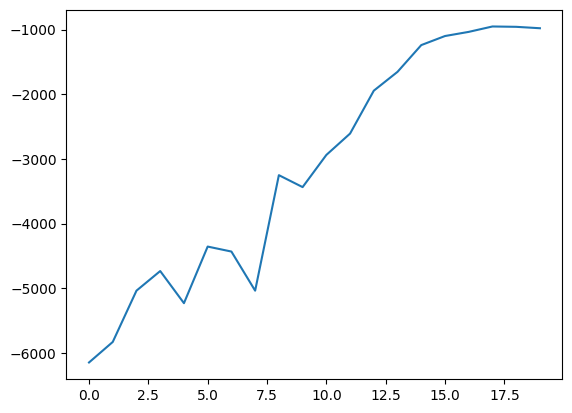

In [6]:
#actualise automatiquement les modules importés
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import torch

from advi2 import ADVI2
from ppca import PPCA_model, PPCA_with_ARD_model

ppca_K = 2
model = PPCA_with_ARD_model(D, ppca_K)
param_keys = model.named_params
param_dims = model.dim_parameters
key_pos = model.key_pos
advi = ADVI2(model, 1, batch_size=10, lr=0.01, mode='meanfield', num_epochs=20)

%matplotlib inline
advi.fit(x_train, method="Adam", plotting=True)

In [6]:
advi.model_params.vparams[0]

tensor([ 1.1131e+00,  2.2274e-01, -1.1442e+00, -1.4453e-01, -8.0010e-03,
         1.0042e+01, -4.6579e+00, -4.4453e+00, -1.1292e-01, -2.6258e+00],
       grad_fn=<SelectBackward0>)

In [7]:
advi.model_params.vparams[1]

tensor([-4.1305, -1.1276, -3.9915, -1.0632, -4.3979, -4.2911, -2.3030, -2.0501,
        -3.1082, -0.6398], grad_fn=<SelectBackward0>)

In [8]:
ppca_K = 2

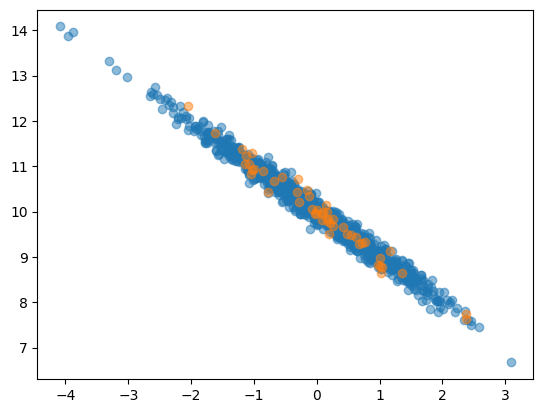

In [9]:
W = advi.model_params.vparams[0, :D*ppca_K].view(D, ppca_K).detach()
mean = advi.model_params.vparams[0, D*ppca_K:D*ppca_K + D].detach()
log_sigma = advi.model_params.vparams[0, D*ppca_K + D:D*ppca_K + 2*D].detach()
log_alpha = advi.model_params.vparams[0, D*ppca_K + 2*D:].detach()
samples = model.rsample(50, W, mean, torch.exp(log_sigma), torch.exp(log_alpha))

plt.scatter(x_train[:, 0], x_train[:, 1], alpha=0.5)
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.show()

In [20]:
print(torch.exp(log_alpha))

tensor([0.1058, 0.7770])
